In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('/content/drive/Team Drives/Tensors/Sandiego_Listings.csv')
#check out the rows and columns
listings.shape

(11801, 106)

In [0]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20190117134358,2019-01-17,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.16
1,5570,https://www.airbnb.com/rooms/5570,20190117134358,2019-01-17,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,NaN
2,8095,https://www.airbnb.com/rooms/8095,20190117134358,2019-01-17,Sunset Cliffs Studio,NaN,"Newly renovated, detached studio with private ...","Newly renovated, detached studio with private ...",none,"proximity to ocean , walkability to ocean beac...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.53
3,38245,https://www.airbnb.com/rooms/38245,20190117134358,2019-01-17,Conference Folks! Room by NTC,Stay in a 1928 Spanish Style home. Den is dow...,Please note: 1928 home; remodeled in 2015. Co...,Stay in a 1928 Spanish Style home. Den is dow...,none,"This neighborhood is an expensive, high-end Po...",...,f,f,moderate,t,t,3,0,3,0,1.37
4,39516,https://www.airbnb.com/rooms/39516,20190117134358,2019-01-17,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,3.34


In [3]:
# spiltting the data into features related only to listing
listings_data = listings[['id','listing_url','name','summary','space','description','experiences_offered',
                          'notes','transit','street','neighbourhood','neighbourhood_cleansed',
                          'neighbourhood_cleansed','city','state','zipcode','market','smart_location',
                          'country_code','country','latitude','longitude','is_location_exact','property_type',
                          'room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities',
                          'square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee',
                          'guests_included','extra_people','minimum_nights','maximum_nights','calendar_updated',
                          'has_availability','availability_30','availability_60','availability_90','availability_365',
                          'number_of_reviews', 'first_review','last_review','review_scores_rating',
                          'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                          'review_scores_communication','review_scores_location','review_scores_value',
                          'reviews_per_month','cancellation_policy','host_response_time','host_response_rate','host_total_listings_count']]

listings_data.to_csv('sandiego_listings_data.csv')
listings_data.head(2)
listings_data.shape

(11801, 62)

In [0]:
# Reading the calender data
calendar = pd.read_csv('/content/drive/Team Drives/Tensors/Sandiego_Calendar.csv')
calendar.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,346722,2019-01-17,t,$100.00,$100.00,2,25
1,6,2019-01-17,f,$139.00,$139.00,2,30


In [0]:
calendar.rename(index=str, columns={"listing_id":"id"},inplace=True)
calendar.shape

(4307365, 7)

In [0]:
#find number of rows in dataset
rows_num = calendar.shape[0]

#find first and last date of the calendar
min_date = calendar['date'].min()
max_date = calendar['date'].max()

print('calendar.csv dataset contains %d rows.' % (rows_num))
print('The first date of observation is %s and the last date is %s.' % (min_date, max_date))

calendar.csv dataset contains 4307365 rows.
The first date of observation is 2019-01-17 and the last date is 2020-01-16.


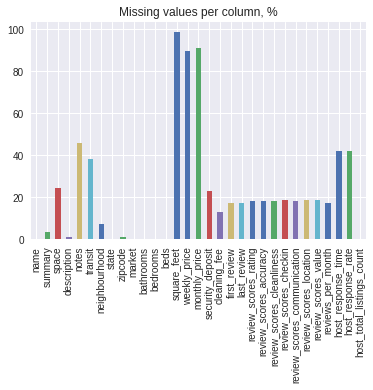

In [0]:
#find percentage of missing values for each column
listings_missing_df = listings_data.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')

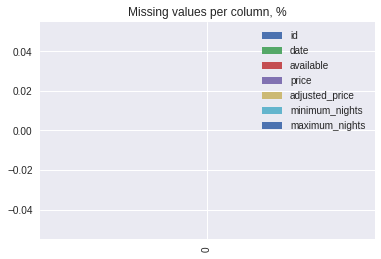

In [0]:
#get percentage of missing values for each column in dataset
calendar_missing_df = pd.DataFrame([calendar.isnull().mean()*100])

#plot the results
calendar_missing_df.plot.bar(title='Missing values per column, %')

In [0]:
#merge datasets in terms of id
df = pd.merge(listings_data,calendar,on = 'id')

print(df.shape)

(4307365, 68)


In [0]:
df= df.sample(frac=1)

In [0]:
df = df.drop(df.index[1:1340000])

In [0]:
print(df.shape)

(2967366, 68)


In [0]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

In [0]:
split_list_into_columns(df, 'amenities')


In [0]:
#Columns to drop
columns_to_drop = ['weekly_price', 'monthly_price','security_deposit', 'cleaning_fee', 'calendar_updated',
                    'summary', 'space', 'description','experiences_offered', 'street', 'neighbourhood', 
                    'notes', 'transit','city', 'state', 'market','listing_url',
                   'smart_location', 'country_code', 'country','is_location_exact', 
                   'square_feet', 'has_availability', 'availability_60', 'availability_90', 'availability_365', 
                  'first_review', 'last_review','price_y','reviews_per_month']
df = df.drop(columns = columns_to_drop,axis = 1)
df.columns

listings_data = listings_data.drop(columns = columns_to_drop,axis = 1)
listings_data.columns

Index(['id', 'name', 'neighbourhood_cleansed', 'neighbourhood_cleansed',
       'zipcode', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy', 'host_response_time',
       'host_response_rate', 'host_total_listings_count'],
      dtype='object')

In [0]:
# Functions to get month and year from date column
def get_month_from_date(row):
    ''' Get month from date represented as a string '''
    return int(row['date'].split('-')[1])

def get_year_from_date(row):
    ''' Get year from date represented as a string '''
    return int(row['date'].split('-')[0])

In [0]:
#convert date from the calendar into month and drop the date colum
df['month'] = df.apply(lambda row: get_month_from_date(row),axis=1)
df['year'] = df.apply(lambda row: get_year_from_date(row),axis=1)
df = df.drop('date', axis =1)

In [0]:
#remove rows where price_x == nan, because price will be used as response column
df = df.dropna(subset=['price_x'])

In [0]:
#convert price to number and drop the price_x column
df['price'] = df['price_x'].astype(str)
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
df = df.drop('price_x', axis =1)

In [0]:
#fill in missing values for bathrooms, bedrooms and beds with mode
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])


In [0]:
#fill in missing values for bathrooms, bedrooms and beds with mode
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])

In [0]:
#fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
for column in review_scores_columns:
        df[column].fillna(df[column].mean(), inplace = True)

In [0]:
df = df.dropna(subset=['zipcode'])
df = df.dropna(subset=['property_type'])
df = df.dropna(subset=['host_response_time'])
df = df.dropna(subset=['host_response_rate'])

In [0]:
df.to_csv('/content/drive/Team Drives/Tensors/Sandiego_Cleaned.csv')


(9505, 49)

In [0]:
for col in df.columns:
    print (col + ', Number of Missing Values:', len(df[col][df[col].isnull()]))

id, Number of Missing Values: 0
name, Number of Missing Values: 244
neighbourhood_cleansed, Number of Missing Values: 1706708
neighbourhood_cleansed, Number of Missing Values: 1706708
zipcode, Number of Missing Values: 0
latitude, Number of Missing Values: 0
longitude, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 0
bedrooms, Number of Missing Values: 0
beds, Number of Missing Values: 0
bed_type, Number of Missing Values: 0
amenities, Number of Missing Values: 0
guests_included, Number of Missing Values: 0
extra_people, Number of Missing Values: 0
minimum_nights_x, Number of Missing Values: 0
maximum_nights_x, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 215103
review_scores_accuracy, Number of Missing Values: 215367
review_